# [Merging DataFrames with pandas](https://www.datacamp.com/courses/merging-dataframes-with-pandas)

## Reading multiple data files
- When reading multiple data files we will likely need multiple DataFrames.
- It is more efficient to iterate over the filenames rather than calling a function like `pd.read_csv()` multiple times:

```python
filenames = ['sales-jan-2015.csv', 'sales-feb-2015.csv']
dataframes = []
for f in filenames:
    dataframes.append(pd.read_csv(f))
    
# List comprehension is more efficient still:
dataframes = [pd.read_csv(f) for f in filenames]
```

- Using `glob` can be useful when dealing with files with similar filenames. 

```python
from glob import glob
filenames = glob('sales*.csv')
dataframes = [pd.read_csv(f) for f in filenames]
```

```python
# Import pandas
import pandas as pd

# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('Bronze.csv')

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('Silver.csv')

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('Gold.csv')

# Print the first five rows of gold
print(gold.head())
```

```python
# Import pandas
import pandas as pd

# Create the list of file names: filenames
filenames = ['Gold.csv', 'Silver.csv', 'Bronze.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())
```

```python
# Import pandas
import pandas as pd

# Make a copy of gold: medals
medals = gold.copy()

# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

# Rename the columns of medals using new_labels
medals.columns = new_labels

# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

# Print the head of medals
print(medals.head())
```

## Sharing data between DataFrames using indexes
- plural of index in English can be **Indexes** or **Indices** 
- we will adopt the following convension moving forward for terminology:
![indexes vs. indices](indexes.png)

### Using `.reindex()`

```python
ordered = ['Jan', 'Apr', 'Jul', 'Oct']
w_mean2 = w_mean.reindex(ordered)
print(w_mean2)

# To move back to an alphebetical ordering:
w_mean2.sort_index()
```

- The input to `.reindex()` can also be *the index* from another DataFrame:

```python
w_mean.reindex(w_max.index)
```

- If `reindex()` encounters an index that is missing from the DataFrame, it will create a new row and fill it with `NaN`.
- Therefore, a common first step when merging DataFrames, is to use the `dropna()` method call.

```python
w_max.reindex(w_mean3.index).dropna()
```

```python
# Import pandas
import pandas as pd

# Read 'monthly_max_temp.csv' into a DataFrame: weather1
weather1 = pd.read_csv('monthly_max_temp.csv', index_col='Month')

# Print the head of weather1
print(weather1.head())

# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

# Print the head of weather2
print(weather2.head())

# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending=False)

# Print the head of weather3
print(weather3.head())

# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values('Max TemperatureF')

# Print the head of weather4
print(weather4.head())
```

```python
# Import pandas
import pandas as pd

# Reindex weather1 using the list year: weather2
weather2 = weather1.reindex(year)

# Print weather2
print(weather2)

# Reindex weather1 using the list year with forward-fill: weather3
weather3 = weather1.reindex(year).ffill()

# Print weather3
print(weather3)
```

In [7]:
import pandas as pd
names_1981 = pd.read_csv('names1981.csv', header=None, names=['name','gender','count'], index_col=(0,1))
names_1881 = pd.read_csv('names1881.csv', header=None, names=['name','gender','count'], index_col=(0,1))

In [8]:
# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

# Print shape of common_names
print(common_names.shape)

# Drop rows with null counts: common_names
common_names = common_names.dropna()

# Print shape of new common_names
print(common_names.shape)

(1935, 1)
(1587, 1)


## Arithmetic with Series and DataFrames

```python
weather.loc['2013-07-01':'2013-07-07', 'PrecipitationIn'] * 2.54
```

```python
week1_range = weather.loc['2013-07-01':'2013-07-07', ['Min TemperatureF', 'Max TemperatureF']]
week1_mean = weather.loc['2013-07-01':'2013-07-07', 'Mean TemperatureF']

week1_range.divide(week1_mean, axis='rows')
# this broadcasts the Series week1_mean across each row to produce the desired ratios

# percentage changes:
week1_mean.pct_change() * 100
```

### If indices do not aline between merged DataFrames we recieve NaN values
- When looking at Olympic medal data, the totals of bronze, silver and gold medals for the top 5 contries to not always align

```python
bronze + silver
# results in NaN values for Germany and Italy

bronze.add(silver)
# results in the same NaN values

bronze.add(silver, fill_values=0)
# results in the desired output

# To add all three DataFrames we use:
bronze.add(silver, fill_value=0).add(gold, fill_value=0)
```

In [9]:
weather = pd.read_csv('pittsburgh2013.csv')

# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[['Min TemperatureF', 'Mean TemperatureF', 'Max TemperatureF']]

# Convert temps_f to celsius: temps_c
temps_c = (temps_f - 32) * 5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F', 'C')

# Print first 5 rows of temps_c
print(temps_c.head())

   Min TemperatureC  Mean TemperatureC  Max TemperatureC
0         -6.111111          -2.222222          0.000000
1         -8.333333          -6.111111         -3.888889
2         -8.888889          -4.444444          0.000000
3         -2.777778          -2.222222         -1.111111
4         -3.888889          -1.111111          1.111111


In [10]:
# Read 'GDP.csv' into a DataFrame: gdp
gdp = pd.read_csv('gdp_usa.csv', index_col='DATE', parse_dates=True)

# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp['2008':]

# Print the last 8 rows of post2008
print(post2008.tail(8))

# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()

# Print yearly
print(yearly)

# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change() * 100

# Print yearly again
print(yearly)

              VALUE
DATE               
2014-07-01  17569.4
2014-10-01  17692.2
2015-01-01  17783.6
2015-04-01  17998.3
2015-07-01  18141.9
2015-10-01  18222.8
2016-01-01  18281.6
2016-04-01  18436.5
              VALUE
DATE               
2008-12-31  14549.9
2009-12-31  14566.5
2010-12-31  15230.2
2011-12-31  15785.3
2012-12-31  16297.3
2013-12-31  16999.9
2014-12-31  17692.2
2015-12-31  18222.8
2016-12-31  18436.5
              VALUE    growth
DATE                         
2008-12-31  14549.9       NaN
2009-12-31  14566.5  0.114090
2010-12-31  15230.2  4.556345
2011-12-31  15785.3  3.644732
2012-12-31  16297.3  3.243524
2013-12-31  16999.9  4.311144
2014-12-31  17692.2  4.072377
2015-12-31  18222.8  2.999062
2016-12-31  18436.5  1.172707


In [11]:
# Import pandas
import pandas as pd

# Read 'sp500.csv' into a DataFrame: sp500
sp500 = pd.read_csv('https://assets.datacamp.com/production/course_1681/datasets/sp500.csv', index_col='Date', parse_dates=True)

# Read 'exchange.csv' into a DataFrame: exchange
exchange = pd.read_csv('exchange.csv', index_col='Date', parse_dates=True)

# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open', 'Close']]

# Print the head of dollars
print(dollars.head())

# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange['GBP/USD'], axis='rows')

# Print the head of pounds
print(pounds.head())

                   Open        Close
Date                                
2015-01-02  2058.899902  2058.199951
2015-01-05  2054.439941  2020.579956
2015-01-06  2022.150024  2002.609985
2015-01-07  2005.550049  2025.900024
2015-01-08  2030.609985  2062.139893
                   Open        Close
Date                                
2015-01-02  1340.364425  1339.908750
2015-01-05  1348.616555  1326.389506
2015-01-06  1332.515980  1319.639876
2015-01-07  1330.562125  1344.063112
2015-01-08  1343.268811  1364.126161


## Appending & Concatenating Series
### `append()`
- `.append()`: Series & DataFrame *method*
- Invocation:
    - S1.append(S2)
- Stack rows of S2 below S1
- Method for Series & DataFrames

### `concat()`
- `concat()`: pandas module *function*
- Invocation:
    - pd.concat([S1, S2, S3])
- Can stack row-wise or column-wise

- `concat()` is equivalent to chaining method calls of `append()`

```python
result1 = pd.concat([S1, S2, S3])
result2 = S1.append(S2).append(S3)
result1 == result2  # Elementwise
```

### `reset_index()`
- using `reset_index()` with `append()`

`new_east = northeast.append(south).reset_index(drop=True)`

- with `concat()`

`new_east = pd.concat([northeast, south], ignore_index=True)`

```python
# Import pandas
import pandas as pd

# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv('sales-jan-2015.csv', parse_dates=True, index_col='Date')

# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv('sales-feb-2015.csv', parse_dates=True, index_col='Date')

# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv('sales-mar-2015.csv', parse_dates=True, index_col='Date')

# Extract the 'Units' column from jan: jan_units
jan_units = jan['Units']

# Extract the 'Units' column from feb: feb_units
feb_units = feb['Units']

# Extract the 'Units' column from mar: mar_units
mar_units = mar['Units']

# Append feb_units and then mar_units to jan_units: quarter1
quarter1 = jan_units.append(feb_units).append(mar_units)

# Print the first slice from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])

# Print the second slice from quarter1
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

# Compute & print total sales in quarter1
print(quarter1.sum())
```

```python
# Initialize empty list: units
units = []

# Build the list of Series
for month in [jan, feb, mar]:
    units.append(month['Units'])

# Concatenate the list: quarter1
quarter1 = pd.concat(units, axis='rows')

# Print slices from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])
```

## Appending & concatenating DataFrames
- performing an outer join with `concat()`

```python
pd.concat([population, unemployment], axis=1)
```

In [16]:
names_1981 = pd.read_csv('names1981.csv', header=None, names=['name','gender','count'])
names_1881 = pd.read_csv('names1881.csv', header=None, names=['name','gender','count'])

# Add 'year' column to names_1881 and names_1981
names_1881['year'] = 1881
names_1981['year'] = 1981

# Append names_1981 after names_1881 with ignore_index=True: combined_names
combined_names = names_1881.append(names_1981, ignore_index=True)

# Print shapes of names_1981, names_1881, and combined_names
print(names_1981.shape)
print(names_1881.shape)
print(combined_names.shape)


(19455, 4)
(1935, 4)
(21390, 4)


In [18]:
# Print all rows that contain the name 'Morgan'
print(combined_names.loc[combined_names['name']=='Morgan'])

         name gender  count  year
1283   Morgan      M     23  1881
2096   Morgan      F   1769  1981
14390  Morgan      M    766  1981


```python
# Concatenate weather_max and weather_mean horizontally: weather
weather = pd.concat([weather_max, weather_mean], axis=1)

# Print weather
print(weather)
```

```python
for medal in medal_types:

    # Create the file name: file_name
    file_name = "%s_top5.csv" % medal
    
    # Create list of column names: columns
    columns = ['Country', medal]
    
    # Read file_name into a DataFrame: df
    medal_df = pd.read_csv(file_name, header=0, index_col='Country', names=columns)

    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals
medals = pd.concat(medals, axis='columns')

# Print medals
print(medals)
```

## Concatenation, keys, & MultiIndexs
- Adding specificity to DataFrames with the same indexes:

```python
rain1314 = pd.concat([rain2013, rain2014], keys=[2013, 2014], axis=0)
print(rain1314)
```

- Review: Slicing Outer Index of MultiIndex:

```python
print(rain1314.loc[2014])
```

- Concatenating the DataFrames to Columns

```python
rain1314 = pd.concat([rain2013, rain2014], keys=[2013, 2014] axis='columns')
```

- Review: Slicing Multi-Level Column Labels (Dictionary Style):

```python
rain1314[2013]
```

- A MultiIndex can be generated by passing a dictionary to `concat()`:

```python
rain_dict = {2013: rain2013, 2014: rain2014}
rain1314 = pd.concat(rain_dict, axis='columns')
print(rain1314)
```

```python
for medal in medal_types:

    file_name = "%s_top5.csv" % medal
    
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, index_col='Country')
    
    # Append medal_df to medals
    medals.append(medal_df)
    
# Concatenate medals: medals
medals = pd.concat(medals, keys=['bronze', 'silver', 'gold'])

# Print medals in entirety
print(medals)
```

```python
# Sort the entries of medals: medals_sorted
medals_sorted = medals.sort_index(level=0)

# Print the number of Bronze medals won by Germany
print(medals_sorted.loc[('bronze','Germany')])

# Print data about silver medals
print(medals_sorted.loc['silver'])

# Create alias for pd.IndexSlice: idx
idx = pd.IndexSlice

# Print all the data on medals won by the United Kingdom
print(medals_sorted.loc[idx[:,'United Kingdom'], :])
```

```python
# Concatenate dataframes: february
february = pd.concat(dataframes, keys=['Hardware', 'Software', 'Service'], axis=1)

# Print february.info()
print(february.info())

# Assign pd.IndexSlice: idx
idx = pd.IndexSlice

# Create the slice: slice_2_8
slice_2_8 = february.loc['2015-02-02':'2015-02-08', idx[:, 'Company']]

# Print slice_2_8
print(slice_2_8)
```

```python
# Make the list of tuples: month_list
month_list = [('january', jan), ('february', feb), ('march', mar)]

# Create an empty dictionary: month_dict
month_dict = {}

for month_name, month_data in month_list:

    # Group month_data: month_dict[month_name]
    month_dict[month_name] = month_data.groupby('Company').sum()

# Concatenate data in month_dict: sales
sales = pd.concat(month_dict)

# Print sales
print(sales)

# Print all sales by Mediacore
idx = pd.IndexSlice
print(sales.loc[idx[:, 'Mediacore'], :])
```

## Outer & Inner Joins
- Generating an example:

```python
import numpy as np
import pandas as pd
A = np.arange(8).reshape(2,4) + 0.1
print(A)
B = np.arange(6).reshape(2,3) + 0.2
print(B)
C = np.arange(12).reshape(3,4) + 0.3
print(C)
```

In [1]:
import numpy as np
import pandas as pd
A = np.arange(8).reshape(2,4) + 0.1
print(A)
B = np.arange(6).reshape(2,3) + 0.2
print(B)
C = np.arange(12).reshape(3,4) + 0.3
print(C)

[[0.1 1.1 2.1 3.1]
 [4.1 5.1 6.1 7.1]]
[[0.2 1.2 2.2]
 [3.2 4.2 5.2]]
[[ 0.3  1.3  2.3  3.3]
 [ 4.3  5.3  6.3  7.3]
 [ 8.3  9.3 10.3 11.3]]


In [2]:
np.hstack([B, A])

array([[0.2, 1.2, 2.2, 0.1, 1.1, 2.1, 3.1],
       [3.2, 4.2, 5.2, 4.1, 5.1, 6.1, 7.1]])

In [3]:
np.concatenate([B, A], axis=1)

array([[0.2, 1.2, 2.2, 0.1, 1.1, 2.1, 3.1],
       [3.2, 4.2, 5.2, 4.1, 5.1, 6.1, 7.1]])

In [4]:
np.vstack([A, C])

array([[ 0.1,  1.1,  2.1,  3.1],
       [ 4.1,  5.1,  6.1,  7.1],
       [ 0.3,  1.3,  2.3,  3.3],
       [ 4.3,  5.3,  6.3,  7.3],
       [ 8.3,  9.3, 10.3, 11.3]])

In [5]:
np.concatenate([A, C], axis=0)

array([[ 0.1,  1.1,  2.1,  3.1],
       [ 4.1,  5.1,  6.1,  7.1],
       [ 0.3,  1.3,  2.3,  3.3],
       [ 4.3,  5.3,  6.3,  7.3],
       [ 8.3,  9.3, 10.3, 11.3]])

## Joins
### Outer join
- Union of index sets (all labels, no repetition)
- Missing fields filled with NaN
### Inner join
- Intersection of index sets (only common labels)

```python
pd.concat([population, unemployment], axis=1, join='inner')

# The default behaviour of concat is 'outer'
pd.concat([population, unemployment], axis=1, join='outer')
```

### [Example 15 concatenating-data](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/concatenating-data?ex=15)
```python
# Create the list of DataFrames: medal_list
medal_list = [bronze, silver, gold]

# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, keys=['bronze', 'silver', 'gold'], axis=1, join='inner')

# Print medals
print(medals)
```

### [Example 16 concatenating-data](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/concatenating-data?ex=16)

```python
# Resample and tidy china: china_annual
china_annual = china.resample('A').pct_change(10).dropna()

# Resample and tidy us: us_annual
us_annual = us.resample('A').pct_change(10).dropna()

# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual, us_annual], axis=1, join='inner')

# Resample gdp and print
print(gdp.resample('10A').last())
```

## Merging Dataframes
- stack DataFrames vertically using `append()`
- stack DataFrames vertically and horizontally using `concat()`

##### Merge extends `concat()` with the ability to align rows using multiple columns

```python
# By default the action of the following code is an inner join
pd.merge(population, cities)

# If we want to match only in one column
pd.merge(bronze, gold, on=['NOC', 'Country'], suffixes=['_bronze', '_gold'])

# When labels to not match
pd.merge(cities, counties, left_on='City', right_on='CITY NAME')
```

### [Example 3 merging data](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/merging-data?ex=3)

```python
# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue, managers, on='city')

# Print merge_by_city
print(merge_by_city)

# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(revenue, managers, on='branch_id')

# Print merge_by_id
print(merge_by_id)
```

### [Example 5 merging data](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/merging-data?ex=5)

```python
# Add 'state' column to revenue: revenue['state']
revenue['state'] = ['TX','CO','IL','CA']

# Add 'state' column to managers: managers['state']
managers['state'] = ['TX','CO','CA','MO']

# Merge revenue & managers on 'branch_id', 'city', & 'state': combined
combined = pd.merge(revenue, managers, on=['branch_id', 'city', 'state'])

# Print combined
print(combined)
```

## Joining DataFrames

```python
pd.merge(bronze, gold, on=['NOC', 'Country'], suffixes=['_bronze', '_gold'], how)
```

- Inputting:

```python
population.join(unemployment)
```

    - performs an inner join (how='left') using the index by default.
- We can also perform a right join like this:

```python
population.join(unemployment, how='right')
```

- We can also use `how='inner'` and `how='outer'`
![Which Join to Use?](which_join.png)

### [Example 9 merging-data](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/merging-data?ex=9)

```python
# Merge revenue and sales: revenue_and_sales
revenue_and_sales = pd.merge(revenue, sales, on=['city', 'state'], how='right')

# Print revenue_and_sales
print(revenue_and_sales)

# Merge sales and managers: sales_and_managers
sales_and_managers = pd.merge(sales, managers, left_on=['city', 'state'], right_on=['branch', 'state'], how='left')

# Print sales_and_managers
print(sales_and_managers)
```

### [Example 10 merging-data](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/merging-data?ex=10)

```python
# Perform the first merge: merge_default
merge_default = pd.merge(sales_and_managers, revenue_and_sales)

# Print merge_default
print(merge_default)

# Perform the second merge: merge_outer
merge_outer = pd.merge(sales_and_managers, revenue_and_sales, how='outer')

# Print merge_outer
print(merge_outer)

# Perform the third merge: merge_outer_on
merge_outer_on = pd.merge(sales_and_managers, revenue_and_sales, on=['city', 'state'], how='outer')

# Print merge_outer_on
print(merge_outer_on)
```

## Ordered merges
- Read in a csv with ordered values:

```python
software = pd.read_csv('feb-sales-Software.csv', parse_dates=['Date']).sort_values('Date')
hardware = pd.read_csv('feb-sales-Hardware.csv', parse_dates=['Date']).sort_values('Date')

# Merge outer is used to generate a Dataframe with all data:
pd.merge(hardware, software, how='outer').sorted_values('Date')

# This previous line is exactly what pd.merge_ordered() does:
# fill_method() allows us to manage null values in our ordered DataFrame
pd.merge_ordered(hardware, software, on=['Date', 'Company'], suffixes=['_hardware', '_software'], fill_method='ffill').head()

```

### [Example 12 merging-data](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/merging-data?ex=12)

```python
# Perform the first ordered merge: tx_weather
tx_weather = pd.merge_ordered(austin, houston)

# Print tx_weather
print(tx_weather)

# Perform the second ordered merge: tx_weather_suff
tx_weather_suff = pd.merge_ordered(austin, houston, on='date', suffixes=['_aus', '_hus'])

# Print tx_weather_suff
print(tx_weather_suff)

# Perform the third ordered merge: tx_weather_ffill
tx_weather_ffill = pd.merge_ordered(austin, houston, on='date', suffixes=['_aus', '_hus'], fill_method='ffill')

# Print tx_weather_ffill
print(tx_weather_ffill)
```

### [Example 13 merging-data](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/merging-data?ex=13)
##### Using merge_asof()

Similar to `pd.merge_ordered()`, the `pd.merge_asof()` function will also merge values in order using the on column, but for each row in the left DataFrame, only rows from the right DataFrame whose 'on' column values are less than the left value will be kept.

This function can be used to align disparate datetime frequencies without having to first resample.

```python
# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date')

# Print the tail of merged
print(merged.tail())

# Resample merged: yearly
yearly = merged.resample('A', on='Date')[['mpg', 'Price']].mean()

# Print yearly
print(yearly)

# print yearly.corr()
print(yearly.corr())
```

`yearly.corr()`, which shows the **Pearson correlation** between the resampled 'Price' and 'mpg'.

## Case Study
### Olympic Data Analysis
*Do host countries win more medals?*

### [Example 2 case-study-summer-olympics](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/case-study-summer-olympics?ex=2)


In [7]:
#Import pandas
import pandas as pd

# Create file path: file_path
file_path = 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep='\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

# Print editions DataFrame
print(editions)

    Edition  Grand Total         City                     Country
0      1896          151       Athens                      Greece
1      1900          512        Paris                      France
2      1904          470    St. Louis               United States
3      1908          804       London              United Kingdom
4      1912          885    Stockholm                      Sweden
5      1920         1298      Antwerp                     Belgium
6      1924          884        Paris                      France
7      1928          710    Amsterdam                 Netherlands
8      1932          615  Los Angeles               United States
9      1936          875       Berlin                     Germany
10     1948          814       London              United Kingdom
11     1952          889     Helsinki                     Finland
12     1956          885    Melbourne                   Australia
13     1960          882         Rome                       Italy
14     196

### [Example 3 case-study-summer-olympics](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/case-study-summer-olympics?ex=3)


In [8]:
# Import pandas
import pandas as pd

# Create the file path: file_path
file_path = 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country', 'NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND
             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


### [Example 4 case-study-summer-olympics](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/case-study-summer-olympics?ex=4)

```python
# Import pandas
import pandas as pd

# Create empty dictionary: medals_dict
medals_dict = {}

for year in editions['Edition']:

    # Create the file path: file_path
    file_path = 'summer_{:d}.csv'.format(year)
    
    # Load file_path into a DataFrame: medals_dict[year]
    medals_dict[year] = pd.read_csv(file_path)
    
    # Extract relevant columns: medals_dict[year]
    medals_dict[year] = medals_dict[year][['Athlete', 'NOC', 'Medal']]
    
    # Assign year to column 'Edition' of medals_dict
    medals_dict[year]['Edition'] = year
    
# Concatenate medals_dict: medals
medals = pd.concat(medals_dict, ignore_index=True)

# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())
```

### [Example 6 case-study-summer-olympics](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/case-study-summer-olympics?ex=6)


In [11]:
medals = pd.read_csv('all_medalists.csv')
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index='Edition', values='Athlete', columns='NOC', aggfunc='count')

# Print the first & last 5 rows of medal_counts
print(medal_counts.head())
print(medal_counts.tail())

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS   AUT  AZE  BAH  ...   URS  URU  \
Edition                                                      ...              
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0   5.0  NaN  NaN  ...   NaN  NaN   
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0   6.0  NaN  NaN  ...   NaN  NaN   
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN   1.0  NaN  NaN  ...   NaN  NaN   
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN   1.0  NaN  NaN  ...   NaN  NaN   
1912     NaN  NaN  NaN  10.0  NaN  NaN  NaN  14.0  NaN  NaN  ...   NaN  NaN   

NOC        USA  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX  
Edition                                             
1896      20.0  NaN  NaN  NaN  NaN  NaN  NaN   6.0  
1900      55.0  NaN  NaN  NaN  NaN  NaN  NaN  34.0  
1904     394.0  NaN  NaN  NaN  NaN  NaN  NaN   8.0  
1908      63.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
1912     101.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[5 rows x 138 columns]
NOC      AFG  AHO  ALG  ANZ   ARG  ARM    AUS  AUT 

### [Example 7 case-study-summer-olympics](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/case-study-summer-olympics?ex=7)

In [12]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
print(fractions.head())
print(fractions.tail())

NOC      AFG  AHO  ALG       ANZ  ARG  ARM       AUS       AUT  AZE  BAH  \
Edition                                                                    
1896     NaN  NaN  NaN       NaN  NaN  NaN  0.013245  0.033113  NaN  NaN   
1900     NaN  NaN  NaN       NaN  NaN  NaN  0.009766  0.011719  NaN  NaN   
1904     NaN  NaN  NaN       NaN  NaN  NaN       NaN  0.002128  NaN  NaN   
1908     NaN  NaN  NaN  0.023632  NaN  NaN       NaN  0.001244  NaN  NaN   
1912     NaN  NaN  NaN  0.011299  NaN  NaN       NaN  0.015819  NaN  NaN   

NOC        ...     URS  URU       USA  UZB  VEN  VIE  YUG  ZAM  ZIM       ZZX  
Edition    ...                                                                 
1896       ...     NaN  NaN  0.132450  NaN  NaN  NaN  NaN  NaN  NaN  0.039735  
1900       ...     NaN  NaN  0.107422  NaN  NaN  NaN  NaN  NaN  NaN  0.066406  
1904       ...     NaN  NaN  0.838298  NaN  NaN  NaN  NaN  NaN  NaN  0.017021  
1908       ...     NaN  NaN  0.078358  NaN  NaN  NaN  NaN  NaN  NaN

### [Example 8 case-study-summer-olympics](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/case-study-summer-olympics?ex=8)

##### [Required Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/computation.html#expanding-windows)

In [13]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change() * 100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
print(fractions_change.head())
print(fractions_change.tail())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC    ...      URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0      ...      NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1      ...      NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2      ...      NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3      ...      NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4      ...      NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]
NOC  Edition  AFG  AH

### [Example 10 case-study-summer-olympics](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/case-study-summer-olympics?ex=10)

In [15]:
# Import pandas
import pandas as pd

# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition','NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
print(hosts)

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN
    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


### [Example 11 case-study-summer-olympics](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/case-study-summer-olympics?ex=11)

In [18]:
# Import pandas
import pandas as pd

# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped.loc[reshaped['NOC'] == 'CHN']

# Print last 5 rows of chn with .tail()
print(chn.tail())

(3588, 3) (26, 139)
     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


### [Example 12 case-study-summer-olympics](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/case-study-summer-olympics?ex=12)

In [20]:
# Import pandas
import pandas as pd

# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts)

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


### [Example 13 case-study-summer-olympics](https://campus.datacamp.com/courses/merging-dataframes-with-pandas/case-study-summer-olympics?ex=13)

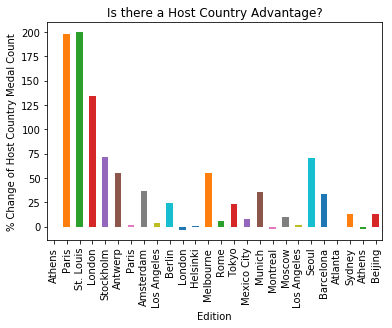

In [22]:
# Import pyplot
import matplotlib.pyplot as plt

# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()